<div align="center">

## Image Processing with Scikit-learn

</div>

### Definition
Image processing are operations on images and videos to:
- Enhance an image
- Extract useful information
- Analyze it and make decisions

<hr/>

### Applications
- Medical image analysis
- Artificial intelligence
- Image restoration and enhancement
- Geospatial computing
- Surveillance
- Robotic vision
- Automotive safety
- And many more...

![image](https://github.com/user-attachments/assets/41f67b51-9044-4a52-ac84-8de19bb2c2a7)

<hr/>

### Image as a multi-dimentional Array
- RGB
- Black and White
- Greyscale 

<img src="https://github.com/user-attachments/assets/a66c2270-4516-4ca7-b715-e670491704e3" height = "500"/>

<img src="https://github.com/user-attachments/assets/e6fc6a7f-ab0e-4650-a879-336941f2fc05" height = "700"/>

<hr/>

### scikit-image
- Easy to use
![image](https://github.com/user-attachments/assets/e831a97c-cf9c-4602-b3ab-d585cecaf029)
- Makes use of Machine Learning
- Out of the box complex algorithms


They have a great documentation website:

https://scikit-image.org/docs/stable/auto_examples/index.html

<hr/>

## DEMO

In [1]:
import skimage
from skimage import data

import matplotlib.pyplot as plt

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    """
    Show an image with title and color mapping
    Args:
        - image: np.array
        - title: Title of the image
        - cmap_type: Color mapping type, 'gray' for grayscale as default
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, filtered, title_filtered):
    """
    Show two images alongside to plot comparison
    Args:
        - original: 
        - filtered:
        - title_filtered: Title for the filtered image
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

### Colors, shape and size with Numpy

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Datatype:  <class 'numpy.ndarray'>
Image size:  786432
Image shape:  (512, 512, 3)


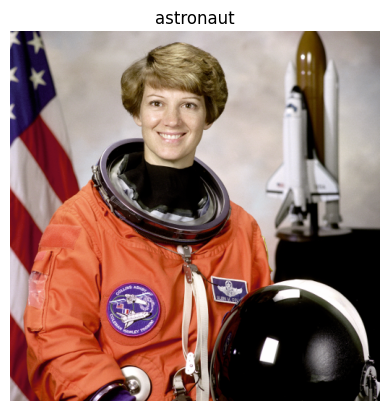

In [4]:
original = data.astronaut()

print("Datatype: ", type(original))
print("Image size: ", original.size)
print("Image shape: ", original.shape)
show_image(original, title="astronaut")

#### Obtaining the colors by channel

In [5]:
red = original[:, :, 0] # Obtaining the red values of the image

green = original[:, :, 1] # Obtaining the green values of the image

blue = original[:, :, 2] # Obtaining the blue values of the image

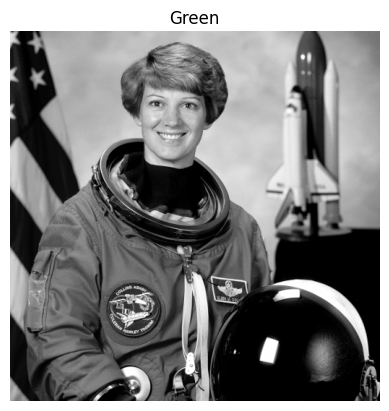

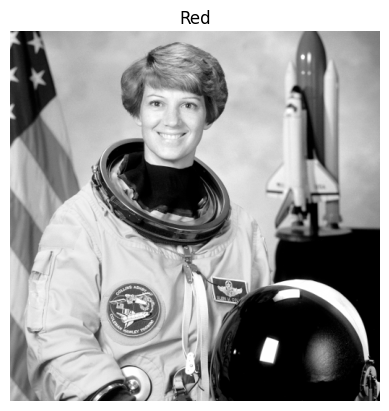

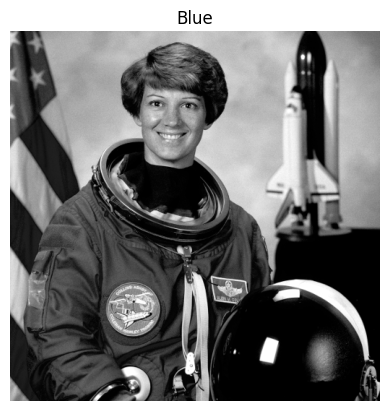

In [6]:
show_image(green, title="Green")
show_image(red, title="Red")
show_image(blue, title="Blue")

<hr/>

### Color histograms

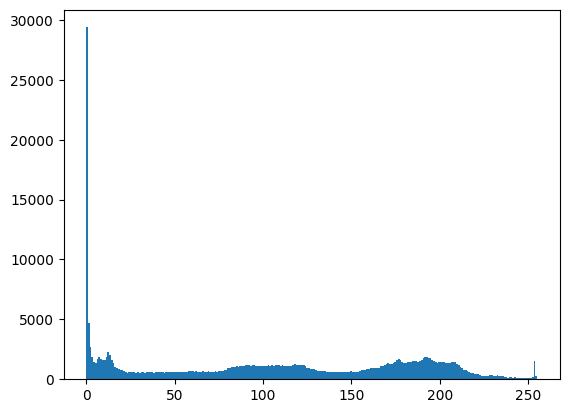

In [8]:
plt.hist(green.ravel(), bins=256);

#### Applications
- Analysis
- Thresholding
- Brightness and contrast
- Equalize an image

<hr/>

### ***Main three functions of image processing***
- Filtering
- Tranformation
- Segmentation

<hr/>

#### **1. Filtering**

- Enhancing an image
- Emphasize or remove features
- Smoothing
- Sharpening
- Edge detection

- **Gaussian smoothing**

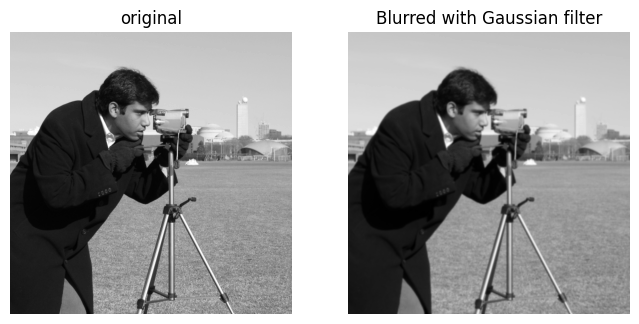

In [9]:
from skimage.filters import gaussian

to_smooth = data.camera()
gaussian_image = gaussian(to_smooth)

plot_comparison(to_smooth, gaussian_image, "Blurred with Gaussian filter")

- **Edge Detection**

- Sobel Edge detection

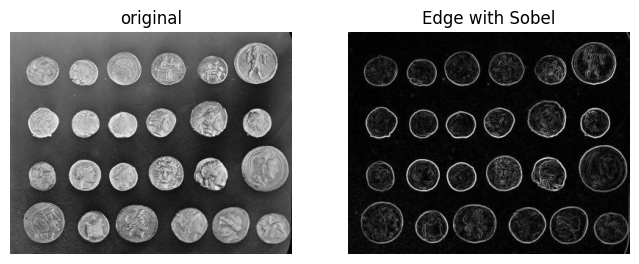

In [10]:
from skimage.filters import sobel

image_coins = data.coins()
edge_sobel = sobel(image_coins)

plot_comparison(image_coins, edge_sobel, "Edge with Sobel")

- Canny Edge detection

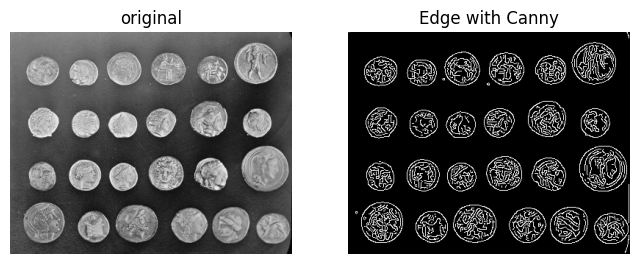

In [11]:
from skimage.feature import canny

edge_canny = canny(image_coins)

plot_comparison(image_coins, edge_canny, "Edge with Canny")

<hr/>

#### **2. Transformation**

- Preparing images for classification Machine Learning models
- Optimization and compression of images
- Save images with same proportion

![image](https://github.com/user-attachments/assets/5fdfcd71-7c4b-47e0-b114-e0b095fc60eb)

- **Rotation**

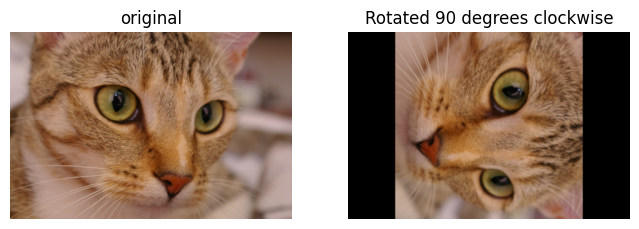

In [16]:
from skimage.transform import rotate

cat_image = data.chelsea()
image_rotated = rotate(cat_image, -90)

plot_comparison(cat_image, image_rotated, 'Rotated 90 degrees clockwise')

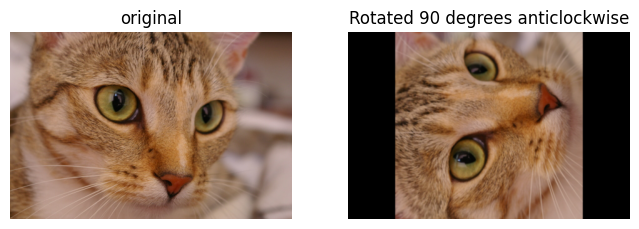

In [17]:
from skimage.transform import rotate

image_rotated = rotate(cat_image, 90)
plot_comparison(cat_image, image_rotated, 'Rotated 90 degrees anticlockwise')

- **Resizing**

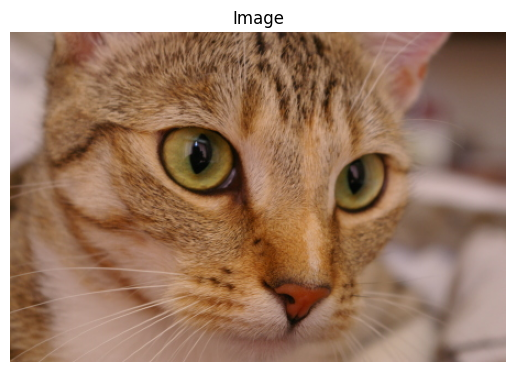

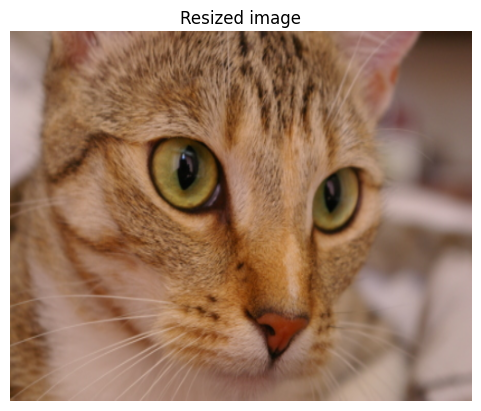

In [18]:
from skimage.transform import resize

height = 400
width = 500

image_resized = resize(cat_image, (height, width)) 

show_image(cat_image)
show_image(image_resized, 'Resized image')

- **REsizing proprtionally**

(300, 451, 3)
(75, 113, 3)


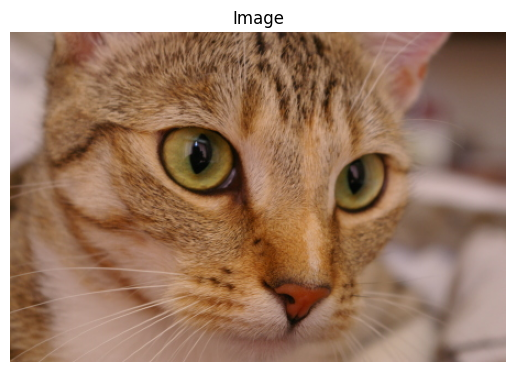

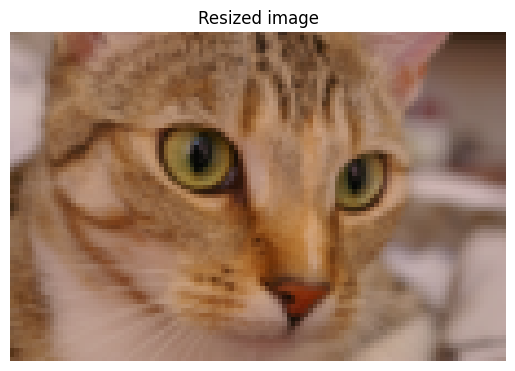

In [19]:
height = cat_image.shape[0] / 4
width = cat_image.shape[1] / 4

image_resized = resize(cat_image, (height, width))

print(cat_image.shape)
print(image_resized.shape)

show_image(cat_image)
show_image( image_resized, 'Resized image')

- **Morphology**
    - better for binary images
    - Can extend for grayscale
    - Operations:
        - Dilation
        - Erosion

In [20]:
image_horse = data.horse()

- **Erosion**

It can split apart joint objects, it can strip away extrusions (like dots

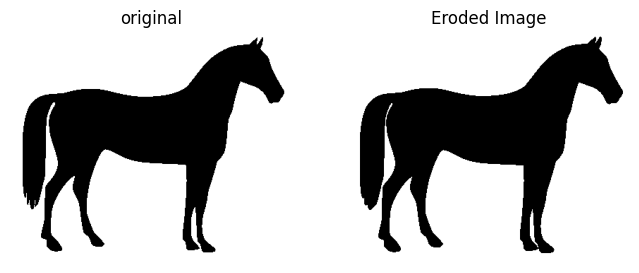

In [22]:
from skimage import morphology

eroded_image = morphology.binary_erosion(image_horse)
plot_comparison(image_horse, eroded_image, "Eroded Image")

- **Dilation**

It can repait breacks, it can repair intrusions

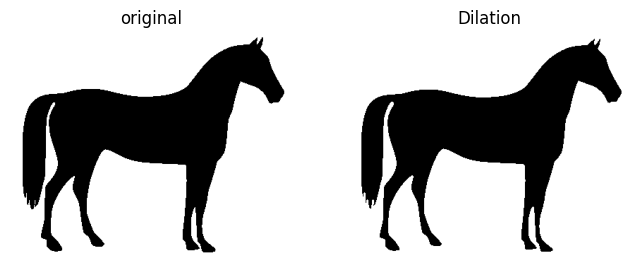

In [23]:
dilated_image = morphology.binary_dilation(image_horse) # Obtain dilated image, using binary dilation

plot_comparison(image_horse, dilated_image, 'Dilation')

#### **3. Sgementation**

Image Segmentation is the process of partitioning an image into multiple segments. The goal is to represent the image as something that is more meaningful and easier to analyze.

- **Thresholding**


Partitioning an image into a foreground and background By making it black and white We do so by setting each pixel to: 
- 255 (white) if pixel > thresh value
- 0 (black) if pixel < thresh value

Simplest method of image segmentation
- Isolate objects
    - Object detection
    - Face detection

Only from grayscale images

In [26]:
page = data.page()

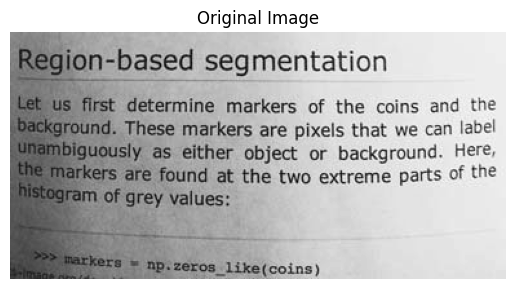

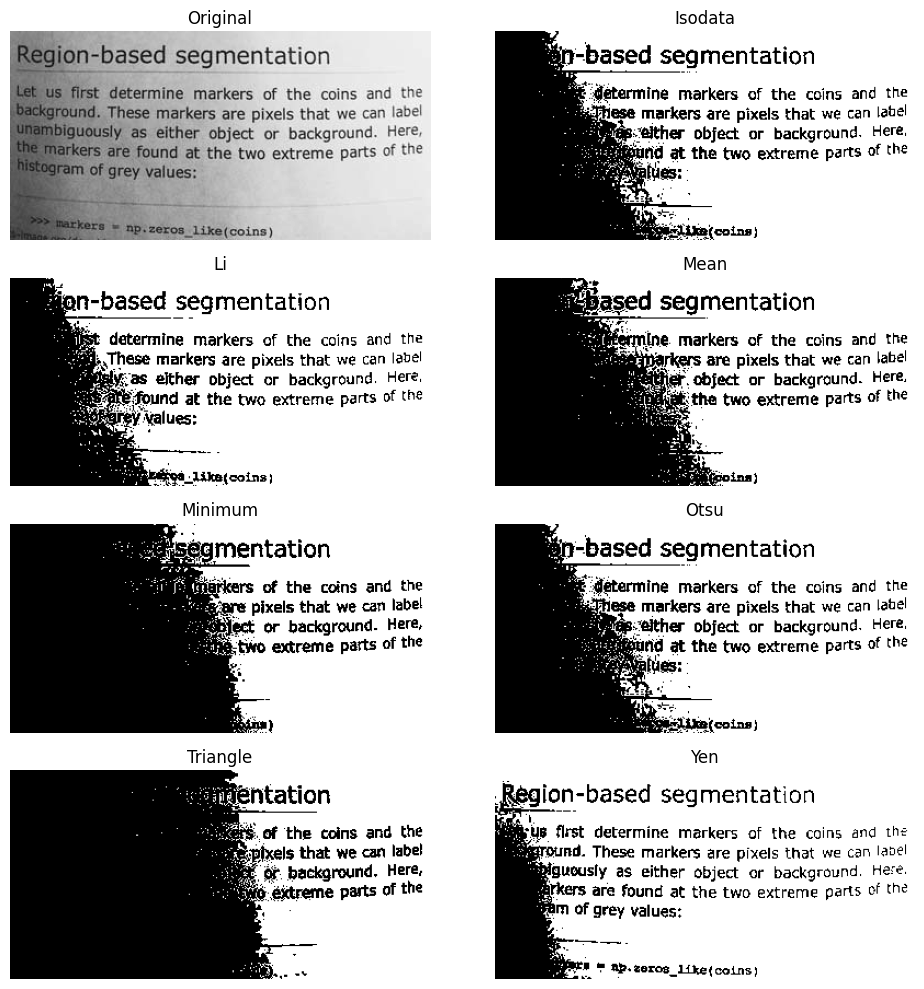

In [27]:
from skimage.filters import try_all_threshold


show_image(page, title="Original Image")

# Obtain all the resulting images
fig, ax = try_all_threshold( page, figsize=(10, 10), verbose=False)
plt.show()

- Global thresholding: 

Determines the threshold value based on the histogram of the overall pixel intensity distribution of the image.

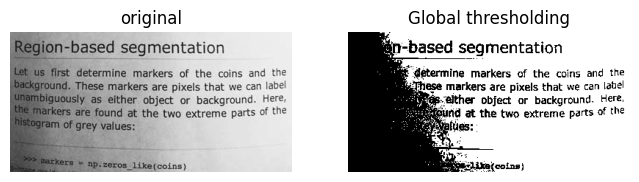

In [28]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu, rank

thresh = threshold_otsu(page) # Obtain the optimal threshold value
binary_global = page >= thresh  # Apply thresholding to the image

plot_comparison(page, binary_global, 'Global thresholding')

- Local thresholding

adaptive thresholding computes the threshold value for each fractional region of the image, so that each fractional region has a different threshold value.

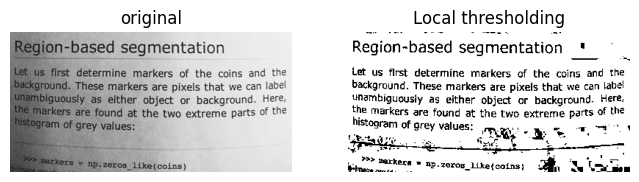

In [29]:
local_otsu = rank.otsu(page, morphology.disk(15))
plot_comparison(page, local_otsu <= page, 'Local thresholding')